<a href="https://colab.research.google.com/github/vcshaffe/MAT-421/blob/main/ModuleG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.4 Simpson's Rule

Simpson's Rule approximates the area under f(x) over two subintervals [x_i-1,x_i] and [x_i,x_i+1] by fitting a quadratic polynomial through the points (xi−1,f(xi−1)),(xi,f(xi)), and (xi+1,f(xi+1))

We first construct the quadratic polynomial approximation of the function over the two subintervals using Lagrange polynomials, then with substitutions for h, we get

Pi(x)=f(xi−1)/2h^2 * (x−xi)(x−xi+1) − f(xi)/h^2 * (x−xi−1)(x−xi+1) + f(xi+1)/2h^2 * (x−xi−1)(x−xi).

We have to sum up the integrals of Pi(x) over every two subintervals, so we must have an even number of intervals for this method to work.

Finally, cancellation and combination leads to the integral expression 
∫xi+1 xi−1 f(x)dx=h/3 * (f(xi−1) + 4f(xi) + f(xi+1))+O(h^5).

Thus, Simpson's Rule is O(h^5) over a subinterval and O(h^4) over the whole interval.

In [4]:
import numpy as np

a = 0
b = np.pi
n = 100
h = (b - a) / (n - 1)
x = np.linspace(a,b,n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
                  + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

1.9991609434038167
0.0008390565961833296


# 21.5 Computing Integrals in Python

scipy.integrate has several functions for computing integrals, and trapz takes input arguments as an array of function values f computed on a numerical grid.

In [5]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 30
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9980436909705548
1.9980436909705552


We also can find an approximated cumulative integral, which we use the cumtrapz function cumsum, which takes the same input arguments as trapz.

<ipython-input-26-11754fcd3c33>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


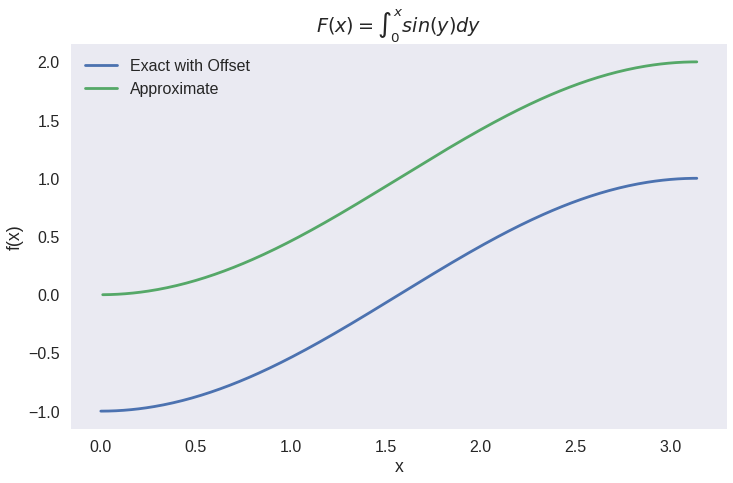

In [26]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approximate'])
plt.show()

The quad(f, a, b) function uses a different method to approximate integrals, integrating the function defined by the function object, f, from a to b.

In [20]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.cos, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

4.9225526349740854e-17
2.2102239425853306e-14 2.0
